# Zillow Home Value Index

### Overview of Domain Knowledge/Data
Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range.

ZHVI tells us the typical home value in a given geography(metro area, city, ZIP Code, etc.), now and over time since 2000. 

In this dataset, we have the "flagship" ZHVI for all homes, middle tier, smoothed and seasonally adjusted cut. The cut represents the missle tier of the market for all homes. It is smoothed to soften short-term variability, and seasonally adjusted to remove the effect of the seasonal cycle of housing (allowing for focus on longer term trends). 

#### What is ZHVI: 
Represents "typical" home value for a region. When referring tot he ZHVI dollar amount, it should be designated as the "typical home value for the region". 

### Layout of Exploratory Data Analysis: 
* Selecting and downloading a dataset
* Data preparation and cleaning
* Exploratory analysis and visualization
* Asking and answering interesting questions
* Summarizing inferences and drawing conclusions

## Getting the Data and Importing Packages

In [225]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

%matplotlib inline
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

pd.options.display.max_columns = 999

In [153]:
df = pd.read_csv("/Users/abeygailpanganiban/Desktop/projects/data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

## Data Prep & Clean

In [154]:
df.columns = [x.lower() for x in df.columns]

df.rename(columns = {'regionid':'region_id',
                     'sizerank':'size_rank',
                     'regionname':'region_name',
                     'regiontype':'region_type',
                     'statename':'state_name'},inplace = True)
df.head()

,region_id,size_rank,region_name,region_type,state_name,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31
0,102001,0,United States,Country,NaN,127566.0,127911.0,128274.0,129013.0,129758.0,130502.0,131260.0,132068.0,132894.0,133725.0,134563.0,135421.0,136222.0,136960.0,137708.0,138508.0,139332.0,140140.0,140954.0,141796.0,142631.0,143470.0,144238.0,144972.0,145642.0,146340.0,147078.0,147858.0,148689.0,149564.0,150512.0,151503.0,152483.0,153467.0,154395.0,155321.0,156165.0,157026.0,157909.0,158863.0,159885.0,160902.0,161965.0,163087.0,164273.0,165459.0,166529.0,167552.0,168570.0,169739.0,171045.0,172473.0,174051.0,175732.0,177521.0,179280.0,180994.0,182625.0,184150.0,185700.0,187222.0,188820.0,190479.0,192384.0,194368.0,196434.0,198478.0,200535.0,202523.0,204370.0,206022.0,207502.0,208753.0,209964.0,211228.0,212597.0,213903.0,215000.0,215803.0,216409.0,216746.0,216990.0,217067.0,217111.0,217093.0,217112.0,217120.0,217138.0,216979.0,216627.0,216017.0,215371.0,214585.0,213767.0,212737.0,211697.0,210454.0,209110.0,207605.0,206032.0,204446.0,202772.0,200975.0,198926.0,196923.0,194997.0,193096.0,191201.0,189353.0,187907.0,186549.0,185285.0,183981.0,182788.0,181718.0,180685.0,179

In [155]:
# Set datetime as index / transpose dataframe
#Creating ZHVI value column

df =(df.melt(id_vars=['region_id','size_rank','region_name','region_type','state_name'],var_name='date',value_name='zhvi')
       .set_index('date'))
df.head(5)

,region_id,size_rank,region_name,region_type,state_name,zhvi
date,,,,,,
2000-01-31,102001,0,United States,Country,NaN,127566.0
2000-01-31,394913,1,"New York, NY",Msa,NY,225655.0
2000-01-31,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231144.0
2000-01-31,394463,3,"Chicago, IL",Msa,IL,171442.0
2000-01-31,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130465.0


In [156]:
# convert index to fixed-frequency DatetimeIndex
df.index = pd.to_datetime(df.index)

In [157]:
df.shape

(236340, 6)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236340 entries, 2000-01-31 to 2021-08-31
Data columns (total 6 columns):
region_id      236340 non-null int64
size_rank      236340 non-null int64
region_name    236340 non-null object
region_type    236340 non-null object
state_name     236080 non-null object
zhvi           187601 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 12.6+ MB


I see there are some null values in our state name, potentially for where the United States shows over time and in our ZHVI values. 

Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (236340). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

We'll need to adjust region_id (identifier for each region) to become object values, and zhvi into numeric.

In [179]:
df.region_id = df.region_id.astype(str)

df['zhvi'] = pd.to_numeric(df.zhvi, errors ='coerce')

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236340 entries, 2000-01-31 to 2021-08-31
Data columns (total 6 columns):
region_id      236340 non-null object
size_rank      236340 non-null int64
region_name    236340 non-null object
region_type    236340 non-null object
state_name     236080 non-null object
zhvi           187601 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 12.6+ MB


In [181]:
df.describe()

,size_rank,zhvi
count,236340.000000,1.876010e+05
mean,458.524752,1.601258e+05
std,267.970186,1.024996e+05
min,0.000000,2.808400e+04
25%,227.000000,9.866400e+04
50%,455.000000,1.313790e+05
75%,687.000000,1.865720e+05
max,933.000000,1.478348e+06


In [161]:
df['zhvi'].isnull().value_counts()

False    187601
True      48739
Name: zhvi, dtype: int64

In [162]:
#Which states have the most null values

df_null = df[df['zhvi'].isnull()]
df_null.groupby('state_name')['region_name'].value_counts(ascending=True)

state_name  region_name                    
AK          Fairbanks, AK                       61
            Juneau, AK                          62
            Ketchikan, AK                       64
AL          Cullman, AL                          3
            Huntsville, AL                       7
            Talladega, AL                       10
            Dothan, AL                          23
            Gadsden, AL                         28
            Ozark, AL                           38
            Decatur, AL                         79
            Albertville, AL                    108
            Valley, AL                         111
            Scottsboro, AL                     119
            Florence, AL                       122
            Anniston, AL                       130
            Enterprise, AL                     149
            Troy, AL                           211
AR          El Dorado, AR                       37
            Helena, AR                

## Exploratory Analysis and Vizualization


Curious about: 
* Vizualizing our timeseries data for certain regions and for the US over time. 
* Vizualizing year of year growth

Understanding the COVID-19 pandemic's impact on the Zillow Home Value Index.
* Regions: San Francisco, CA. New York, NY. Austin, TX. Seattle, WA.
* Forecasting growth for next year.
* Linear Regression from 2020-2021 for next year

## New York, NY

Plotting date times is also not that hard, you got this! Core Idea is 

(1) use pd.to_datetime to transform your string date into a date time object. Provide it the date format 


(2) plot just like you usually would!

```
data.time = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S.%f')
data.set_index(['time'],inplace=True)
data.plot()

#OR 
plt.plot(data.index, data.amount)
```


In [163]:
# Getting rows,columns for New York state

df[df['state_name'] == 'NY'].shape


(6760, 6)

In [164]:
#Creating dataframe for New York state

ny = df[df['state_name'] == 'NY']
ny.head(5)

,region_id,size_rank,region_name,region_type,state_name,zhvi
date,,,,,,
2000-01-31,394913,1,"New York, NY",Msa,NY,225655.0
2000-01-31,394425,47,"Buffalo, NY",Msa,NY,94479.0
2000-01-31,395031,51,"Rochester, NY",Msa,NY,101291.0
2000-01-31,394308,60,"Albany, NY",Msa,NY,108668.0
2000-01-31,395143,79,"Syracuse, NY",Msa,NY,83712.0


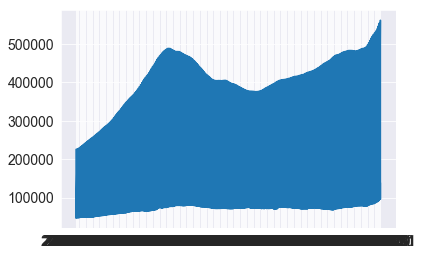

In [128]:
plt.plot(ny.index,ny.zhvi,linestyle = 'solid')

Very crowded viz with far too many data points. 

We will be drilling down into our region, New York, NY for city's ZHVI over time. Possible to also resample our data for a larger spread of long-term focus. 

In [165]:
# Create and Shape for New York, NY city dataframe
ny_city = ny[ny['region_name'] == 'New York, NY']
print(ny_city.shape)
ny_city.head(5)

(260, 6)


,region_id,size_rank,region_name,region_type,state_name,zhvi
date,,,,,,
2000-01-31,394913,1,"New York, NY",Msa,NY,225655.0
2000-02-29,394913,1,"New York, NY",Msa,NY,227004.0
2000-03-31,394913,1,"New York, NY",Msa,NY,228217.0
2000-04-30,394913,1,"New York, NY",Msa,NY,230605.0
2000-05-31,394913,1,"New York, NY",Msa,NY,232828.0


In [183]:
ny_city.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2000-01-31 to 2021-08-31
Data columns (total 6 columns):
region_id      260 non-null object
size_rank      260 non-null int64
region_name    260 non-null object
region_type    260 non-null object
state_name     260 non-null object
zhvi           260 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 14.2+ KB


In [166]:
# Summary statistics for our ZHVI 
# quartile bounds will help in checking against our VIZ axis

ny_city.describe()

,size_rank,zhvi
count,260.0,260.000000
mean,1.0,408887.480769
std,0.0,72140.106955
min,1.0,225655.000000
25%,1.0,379383.250000
50%,1.0,413276.500000
75%,1.0,467635.000000
max,1.0,561677.000000


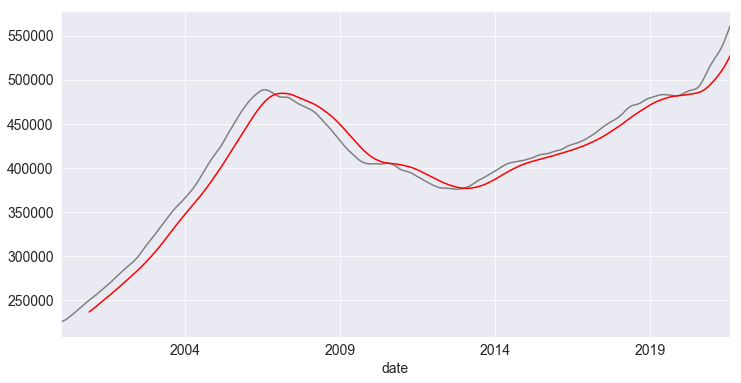

In [191]:
ny_city['zhvi'].plot(color="grey", figsize=(12,6))
ny_city.zhvi.rolling(12).mean().plot(color="red")

In [ ]:
# Prepare data
ny_city['year'] = [d.year for d in ny_city.index]
ny_city['month'] = [d.strftime('%b') for d in ny_city.index]
ny_years = ny_city['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(matplotlib.colors.XKCD_COLORS.keys()), len(ny_years), replace=False)

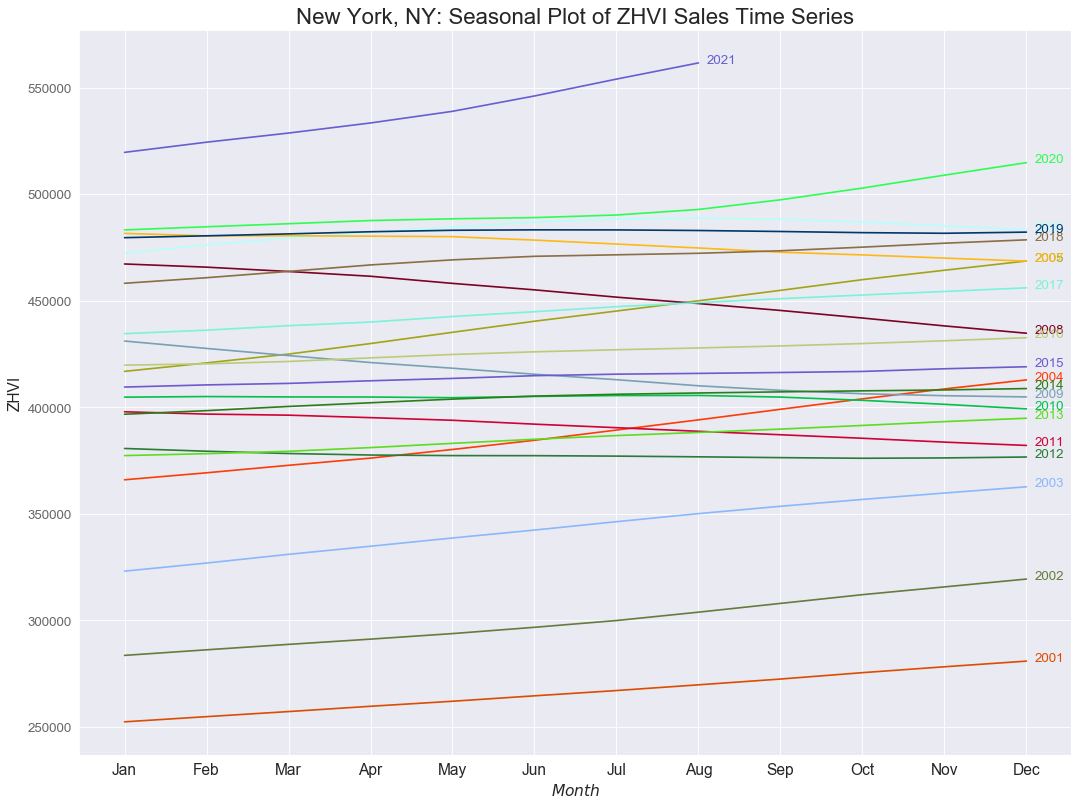

In [211]:
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'zhvi', data=ny_city.loc[ny_city.year==y, :], color=mycolors[i], label=y)
        plt.text(ny_city.loc[ny_city.year==y, :].shape[0]-.9, ny_city.loc[ny_city.year==y, 'zhvi'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(ylabel='ZHVI', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("New York, NY: Seasonal Plot of ZHVI Sales Time Series", fontsize=20)
plt.show()

(array([15., 13.,  9., 10., 38., 67., 36., 60.,  6.,  6.]),
 array([225655. , 259257.2, 292859.4, 326461.6, 360063.8, 393666. ,
        427268.2, 460870.4, 494472.6, 528074.8, 561677. ]),
 <a list of 10 Patch objects>)

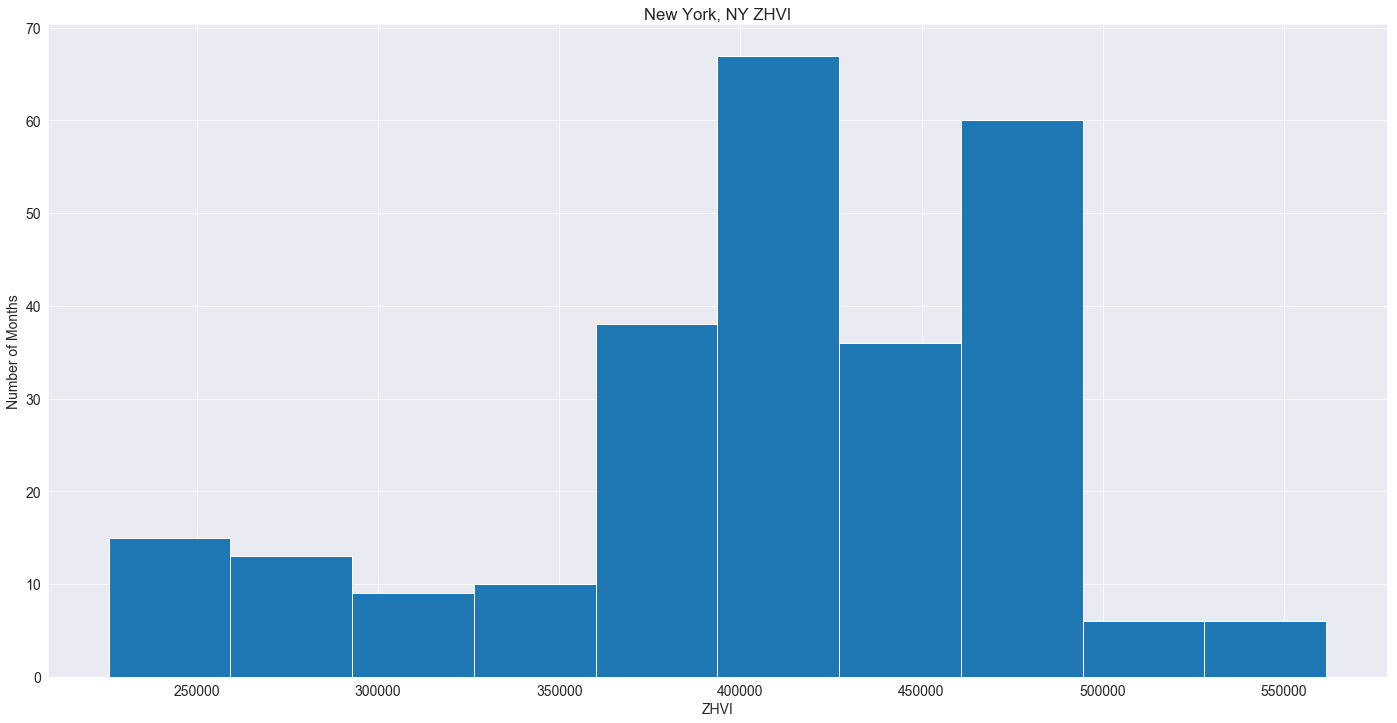

In [133]:
plt.figure(figsize=(24,12))
plt.title('New York, NY ZHVI')
plt.xlabel('ZHVI')
plt.ylabel('Number of Months')

plt.hist(ny_city.zhvi)


In [215]:
us = df[df['region_name'] == 'United States']
us.head()

,region_id,size_rank,region_name,region_type,state_name,zhvi,year,month
date,,,,,,,,
2000-01-31,102001,0,United States,Country,NaN,127566.0,2000,Jan
2000-02-29,102001,0,United States,Country,NaN,127911.0,2000,Feb
2000-03-31,102001,0,United States,Country,NaN,128274.0,2000,Mar
2000-04-30,102001,0,United States,Country,NaN,129013.0,2000,Apr
2000-05-31,102001,0,United States,Country,NaN,129758.0,2000,May


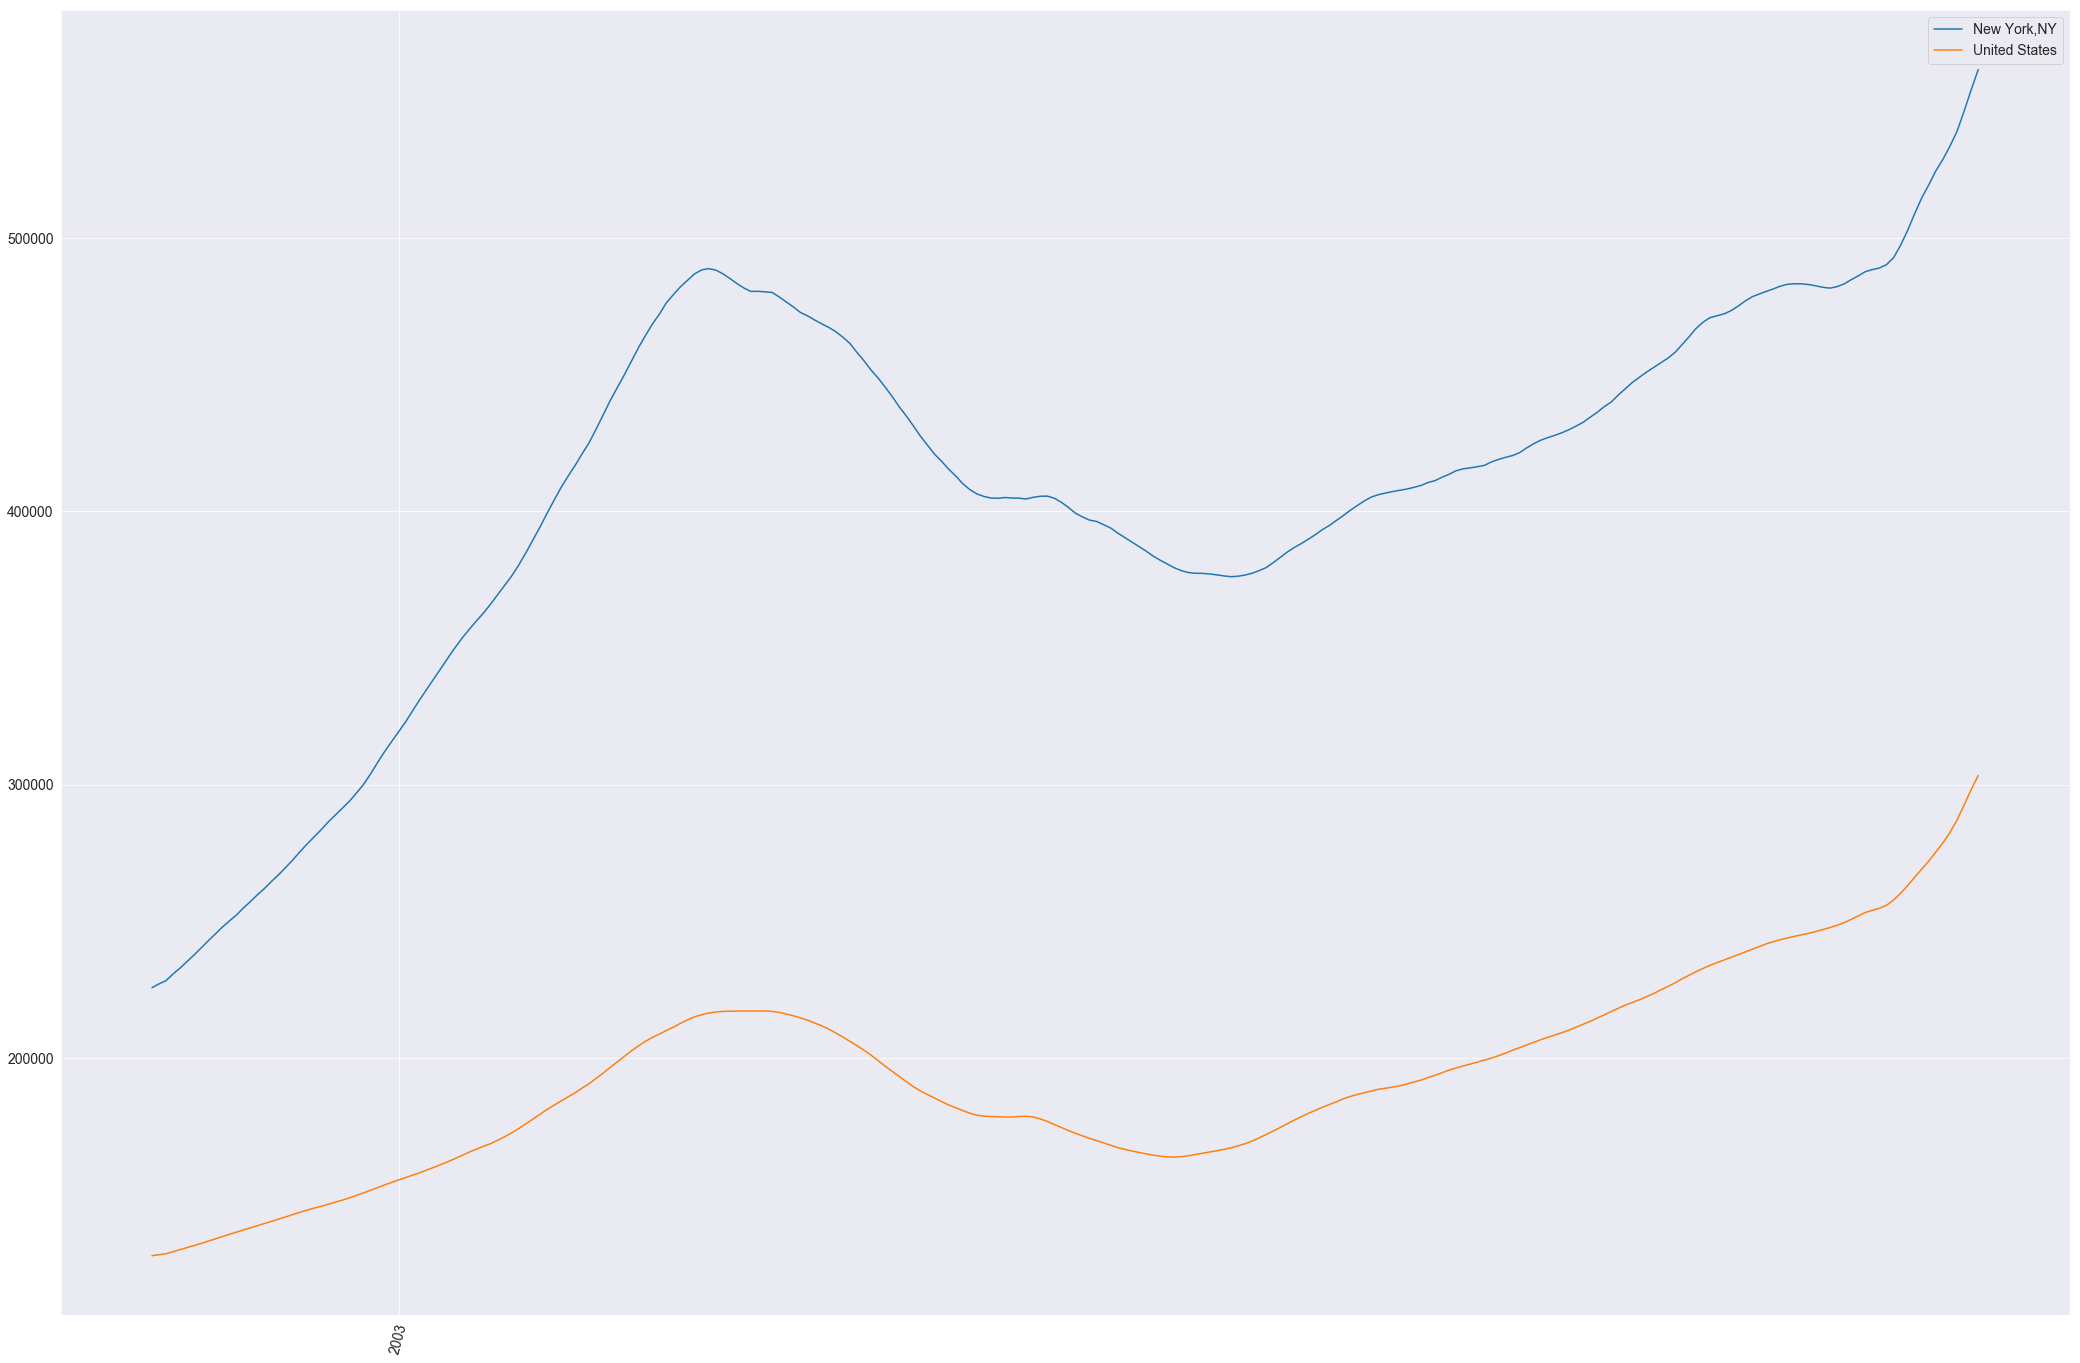

In [232]:
# TODO: Fix axis font

import matplotlib.dates as mdates

#https://benalexkeen.com/resampling-time-series-data-with-pandas/ (here's a really cool article on resampling that you might like)
plt.plot(ny_city.index,ny_city.zhvi, label='New York,NY', linestyle = 'solid')
plt.plot(us.index,us.zhvi,label = 'United States',linestyle = 'solid')

ax = plt.gca()
plt.rcParams["figure.figsize"] = (36,24)

#write a function for every 6 months
#time delta of this plus this until i get to 2021

plt.xticks(rotation=75)
xticks = ax.xaxis.get_major_ticks()
for i, xtick in enumerate(xticks):
    if i % 6 == 0:
        continue
    else:
        xticks[i].set_visible(False)

plt.legend()
plt.show()


From Zillow's User Guide: 

Calculating historical and forecasted growth
Yearly growth rates for ZHVI are always calculated same month to same month. For example, if you wish to display how much home values have changed over the prior year (in percentage terms), you use the formula:

100 * [ ZHVI_{this month current year} – ZHVI_{this month last year} ] / [ ZHVI_{this month last year} ]

 

To calculate the forecasted growth for the coming year, you use the same formula, but substitute  ZHVF for ZHVI for one point:

100 * [ ZHVF_{this month next year} – ZHVI_{this month current year} ] / [ ZHVI_{this month current year} ]


**Idea**
* Show dashboard of city ZHVI with historical bar graph of 2019,2020,2021 year of year historical growth side by side [https://dfrieds.com/data-visualizations/visualize-historical-time-comparisons.html]
* Time series graph of historical and forecasted housing prices for New York, NY on a dashboard [https://towardsdatascience.com/building-a-data-dashboard-for-housing-prices-using-plotly-dash-in-python-7aca9c49592c]

In [62]:
#100 * [ ZHVI_{this month current year} – ZHVI_{this month last year} ] / [ ZHVI_{this month last year} ]

ny_city